In [1]:
# 기본 라이브러리 호출
import warnings
warnings.filterwarnings('ignore')
warnings.warn("once")
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import norm, skew
# 선형모델을 추정하는 라이브러리
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.api as sms
from patsy import dmatrices
color = sns.color_palette()

pd.set_option('display.float_format','{:,.4f}'.format) # 소수점 2번째 자리까지 표현
pd.set_option('display.max_columns', None) # 모든 컬럼 표시
pd.set_option('display.max_colwidth', -1) # 컬럼내용 전체 표시

#Graph에 한글을 표시하기 위한 코드
import matplotlib
from matplotlib import font_manager, rc
import platform
# font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
font_name = font_manager.FontProperties(fname="/usr/share/fonts/NanumGothicCoding.ttf").get_name()
rc('font', family=font_name)\
    
matplotlib.rcParams['axes.unicode_minus'] = False

# 1. 통계분석 (사용 데이터 : Admission)

### Q1) 종속변수인 chance_of_admit(입학 허가 확률)와 독립변수(GRE, TOEFL, 
###     Univ_Rating, SOP, LOR, CGPA)에 대해 피어슨 상관계수를 이용한 상관관계 분석을 
###     수행하고 그래프를 이용하여 분석결과를 설명하시오.

In [2]:
df = pd.read_csv('./data/모의고사 2회/Admission.csv')
print(df.shape)
df.head()

(400, 8)


,GRE,TOEFL,Univ_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5000,4.5000,9.6500,1,0.9200
1,324,107,4,4.0000,4.5000,8.8700,1,0.7600
2,316,104,3,3.0000,3.5000,8.0000,1,0.7200
3,322,110,3,3.5000,2.5000,8.6700,1,0.8000
4,314,103,2,2.0000,3.0000,8.2100,0,0.6500


In [3]:
df = df.rename(columns = {'LOR ' : 'LOR'})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GRE              400 non-null    int64  
 1   TOEFL            400 non-null    int64  
 2   Univ_Rating      400 non-null    int64  
 3   SOP              400 non-null    float64
 4   LOR              400 non-null    float64
 5   CGPA             400 non-null    float64
 6   Research         400 non-null    int64  
 7   Chance_of_Admit  400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [5]:
df.columns

Index(['GRE', 'TOEFL', 'Univ_Rating', 'SOP', 'LOR', 'CGPA', 'Research',
       'Chance_of_Admit'],
      dtype='object')

In [6]:
columns_list = ['GRE', 'TOEFL', 'Univ_Rating', 'SOP', 'LOR', 'CGPA']

In [7]:
corr_df = pd.DataFrame(columns = ['변수명', '상관계수', 'p-value'])
corr_df['변수명'] = columns_list

In [8]:
corr_list = []
p_value_list = []
for i in columns_list:
    corr_list.append(stats.pearsonr(df['Chance_of_Admit'], df[i])[0])
    p_value_list.append(stats.pearsonr(df['Chance_of_Admit'], df[i])[1])
corr_df['상관계수'] = corr_list
corr_df['p-value'] = p_value_list
corr_df

,변수명,상관계수,p-value
0,GRE,0.8026,0.0000
1,TOEFL,0.7916,0.0000
2,Univ_Rating,0.7113,0.0000
3,SOP,0.6757,0.0000
4,LOR,0.6699,0.0000
5,CGPA,0.8733,0.0000


* GRE 경우 상관계수는 0.80으로 입학허가확률과 강한 상관관계가 존재. p-value는 0.00로 유의수준 0.05하에서 두 변수간의 상관관계는 통계적으로 유의하다

In [9]:
corr = df[['Chance_of_Admit', 'GRE', 'TOEFL', 'Univ_Rating', 'SOP', 'LOR', 'CGPA']].corr(method = 'pearson')

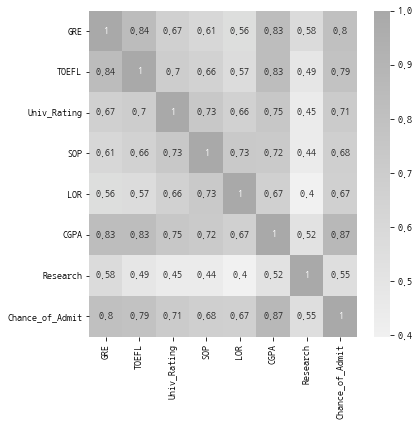

In [10]:
plt.figure(figsize = (6,6))
cmap = sns.light_palette("darkgray", as_cmap=True)
sns.heatmap(df.corr(method = 'pearson'), annot=True, cmap=cmap)
plt.show()

In [11]:
df.columns

Index(['GRE', 'TOEFL', 'Univ_Rating', 'SOP', 'LOR', 'CGPA', 'Research',
       'Chance_of_Admit'],
      dtype='object')

In [15]:
df.loc[:, 'GRE':'Research']

,GRE,TOEFL,Univ_Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5000,4.5000,9.6500,1
1,324,107,4,4.0000,4.5000,8.8700,1
2,316,104,3,3.0000,3.5000,8.0000,1
3,322,110,3,3.5000,2.5000,8.6700,1
4,314,103,2,2.0000,3.0000,8.2100,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5000,3.5000,9.0400,1
396,325,107,3,3.0000,3.5000,9.1100,1
397,330,116,4,5.0000,4.5000,9.4500,1
398,312,103,3,3.5000,4.0000,8.7800,0


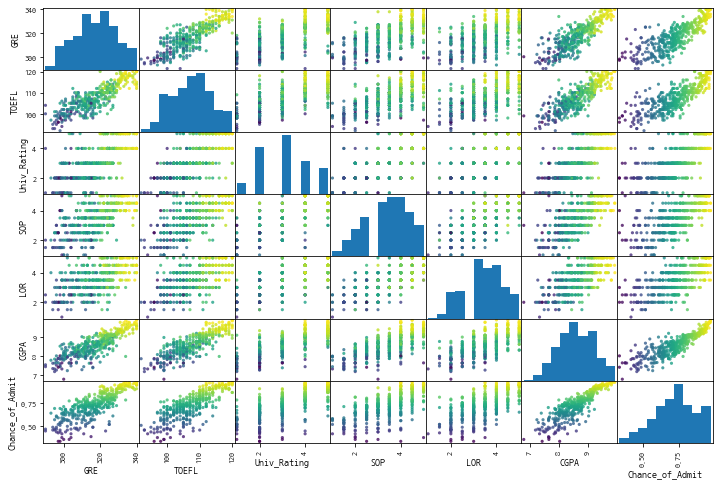

In [19]:
from pandas.plotting import scatter_matrix

scatter_matrix(df.drop(columns = ['Research']),
               c = df['Chance_of_Admit'], # 점 색깔
               marker = 'o', # 점 모양, default ‘.’
               s = 10, # 점 크기
               alpha = 0.8, # 투명도
               figsize = (12, 8)
              )
plt.show()

### Q2) GRE, TOEFL, Univ_Rating, SOP, LOR, CGPA, Research가 Chance_of_Admit에 
###     영향을 미치는지 알아보는 회귀분석을 단계적 선택법을 사용하여 수행하고 결과를 해석하시오.

In [31]:
df.columns

Index(['GRE', 'TOEFL', 'Univ_Rating', 'SOP', 'LOR', 'CGPA', 'Research',
       'Chance_of_Admit'],
      dtype='object')

In [32]:
model = sm.OLS.from_formula('Chance_of_Admit ~ GRE + TOEFL + Univ_Rating + SOP + LOR + CGPA + Research', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance_of_Admit   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     228.9
Date:                Fri, 18 Sep 2020   Prob (F-statistic):          3.12e-134
Time:                        14:50:43   Log-Likelihood:                 537.37
No. Observations:                 400   AIC:                            -1059.
Df Residuals:                     392   BIC:                            -1027.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.2594      0.125    -10.097      0.000      -1.505      -1.014
GRE             0.0017      0.001      2.906      0.004       0.001       0.003
TOEFL           0.0029      0.001      2.680      0.008       0.001       0.005
Univ_Rating     0.0057      0.005      1.198      0.232      -0.004       0.015
SOP            -0.0033      0.006     -0.594      0.553      -0.014       0.008
LOR             0.0224      0.006      4.034      0.000       0.011       0.033
CGPA            0.1189      0.012      9.734      0.000       0.095       0.143
Research        0.0245      0.008      3.081      0.002       0.009       0.040
==============================================================================
Omnibus:                       87.895   Durbin-Watson:                   0.759
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.191
Skew:                          -1.159   Prob(JB):                     4.52e-40
Kurtosis:                       5.344   Cond. No.                     1.31e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(model.resid)

0.7587608191706569

* Durbin-Watson 검정 결과값이 0.76로 0에 가깝기 때문에 독립성 가정을 만족한다고 보기 어렵다

In [34]:
shapiro_test = stats.shapiro(model.resid)
shapiro_test

(0.9206659197807312, 1.0865985980998763e-13)

* Shapiro-Wilk 검정 결과 p-value가 0.09로 유의수준 0.05하에서 귀무가설을 기각한다. 따라서 adms 데이터는 정규분포를 따른다고 보기 어렵다

In [37]:
fitted = model.predict(df)
residual = df['Chance_of_Admit'] - fitted

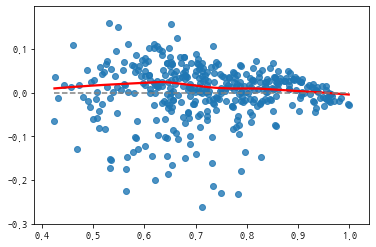

In [41]:
sns.regplot(fitted, residual, lowess=True, line_kws={'color': 'red'})
plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey')

* 그래프의 기울기가 직선 성향, 평균인 0을 중ㅇ심으로 고르게 분포(등분산성 만족)

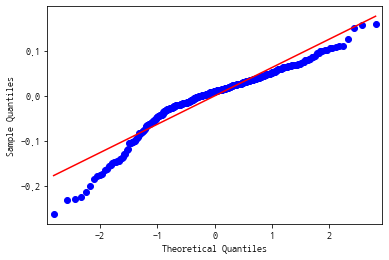

In [42]:
from statsmodels.graphics.gofplots import qqplot
qqplot(model.resid, line='s')
plt.show()

* 대각선에 벗어난 점이 많아 adms가 정규성을 만족한다고 보기 힘듬

In [43]:
sr = stats.zscore(residual)

Text(0, 0.5, 'sqrt_resid')

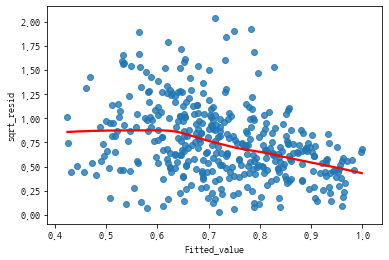

In [45]:
sns.regplot(fitted, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted_value')
plt.ylabel('sqrt_resid')

* 빨간선의 기울기가 0에 가까워야 하지만 Fitted Value가 증가할수록 기울기가 줄어듬
* 기울기가 0에서 떨어진 점이 있다면 표준화 잔차가 큼, y값 적합 잘 못함

In [46]:
from statsmodels.stats.outliers_influence import OLSInfluence
cd, _ = OLSInfluence(model).cooks_distance
cd.sort_values(ascending=False).head()

92   0.0438
91   0.0434
40   0.0336
95   0.0328
9    0.0309
dtype: float64

# 2. 정형 데이터마이닝 (사용 데이터 : Titanic)

### Q1) cabib, embarked변수의 값 중 ""로 처리된 값을 NA로 바꾸고 아래의 데이터 테이블을 보고 
###     문자형, 범주형 변수들을 각각 character, factor형으로 변환하시오.
###     또, 수치형 변수가 NA인 값을 중앙값으로 대체하고, 범주형 변수가 NA인 값을 최빈값으로 대체하고
###     age변수를 아래의 표와 같이 구간화하여 age_1이라는 변수를 생성하고 추가하시오. 

In [115]:
df = pd.read_csv('./data/모의고사 2회/titanic.csv')
print(df.shape)
df.head()

(1309, 11)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9200,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S


In [116]:
df.isna().sum()

pclass      0   
survived    0   
name        0   
sex         0   
age         263 
sibsp       0   
parch       0   
ticket      0   
fare        1   
cabin       1014
embarked    2   
dtype: int64

In [117]:
df['embarked'].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [119]:
df['pclass'] = df['pclass'].astype('category')
df['survived'] = df['survived'].astype('category')

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1309 non-null   category
 1   survived  1309 non-null   category
 2   name      1309 non-null   object  
 3   sex       1309 non-null   object  
 4   age       1046 non-null   float64 
 5   sibsp     1309 non-null   int64   
 6   parch     1309 non-null   int64   
 7   ticket    1309 non-null   object  
 8   fare      1308 non-null   float64 
 9   cabin     295 non-null    object  
 10  embarked  1307 non-null   object  
dtypes: category(2), float64(2), int64(2), object(5)
memory usage: 94.9+ KB


In [121]:
df.isna().sum()

pclass      0   
survived    0   
name        0   
sex         0   
age         263 
sibsp       0   
parch       0   
ticket      0   
fare        1   
cabin       1014
embarked    2   
dtype: int64

In [122]:
age_med = np.nanmedian(df['age'])

In [123]:
age_med

28.0

In [124]:
df['age'] = df['age'].fillna(value = age_med)

In [125]:
fare_med = np.nanmedian(df['fare'])

In [126]:
df['fare'] = df['fare'].fillna(value = fare_med)

In [127]:
from collections import Counter as cc
cnt = cc(df['cabin'])
cnt.most_common()[1][0]

'C23 C25 C27'

In [128]:
df['cabin'] = df['cabin'].fillna(value = cnt.most_common()[1][0])

In [129]:
from collections import Counter as cc
cnt = cc(df['embarked'])
cnt.most_common()[:10]

[('S', 914), ('C', 270), ('Q', 123), (nan, 2)]

In [130]:
df['embarked'] = df['embarked'].fillna(value = 'S')

In [131]:
df.loc[((df['age'] >= 0) & (df['age'] < 10)), 'age_1'] = 0
df.loc[((df['age'] >= 10) & (df['age'] < 20)), 'age_1'] = 1
df.loc[((df['age'] >= 20) & (df['age'] < 30)), 'age_1'] = 2
df.loc[((df['age'] >= 30) & (df['age'] < 40)), 'age_1'] = 3
df.loc[((df['age'] >= 40) & (df['age'] < 50)), 'age_1'] = 4
df.loc[((df['age'] >= 50) & (df['age'] < 60)), 'age_1'] = 5
df.loc[((df['age'] >= 60) & (df['age'] < 70)), 'age_1'] = 6
df.loc[((df['age'] >= 70) & (df['age'] < 80)), 'age_1'] = 7
df.loc[((df['age'] >= 80) & (df['age'] < 90)), 'age_1'] = 8


In [132]:
df['age_1'].value_counts()

2.0000    607
3.0000    232
1.0000    143
4.0000    135
0.0000    82 
5.0000    70 
6.0000    32 
7.0000    7  
8.0000    1  
Name: age_1, dtype: int64

In [133]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,age_1
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2.0000
1,1,1,"Allison, Master. Hudson Trevor",male,0.9200,1,2,113781,151.5500,C22 C26,S,0.0000
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0.0000
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,3.0000
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,2.0000


### Q2) 전처리가 완료된 titanic 데이터를 train(70%), test(30%) 데이터로 분할하시오.
###    (set.seed(12345)를 실행한 후 데이터를 분할하시오.) 
###    또, train 데이터로 종속변수인 survived(생존 여부)를 독립변수 pclass, sex, sibsp, parch, 
###    fare, embarked로 지정하여 예측하는 분류모델을 3개 이상 생성하고 test 데이터에 대한 
###    예측값을 csv파일로 각각 제출하시오.

In [134]:
# !pip install xgboost

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
lr = LogisticRegression()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
xgb = XGBClassifier()

In [136]:
X = df[['pclass', 'sex', 'sibsp', 'parch', 'fare', 'embarked']]
y = df['survived']

In [137]:
X = pd.get_dummies(X)

In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 6789)

In [139]:
df.isna().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
cabin       0
embarked    0
age_1       0
dtype: int64

In [140]:
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)
pd.Series(lr_y_pred).value_counts()

0    260
1    133
dtype: int64

In [141]:
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
pd.Series(rf_y_pred).value_counts()

0    269
1    124
dtype: int64

In [142]:
xgb.fit(X_train, y_train)
xgb_y_pred = xgb.predict(X_test)
pd.Series(xgb_y_pred).value_counts()

0    269
1    124
dtype: int64

In [143]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, lr_y_pred)
print('오차 행렬:\n', confusion)

오차 행렬:
 [[207  34]
 [ 53  99]]


In [144]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       241
           1       0.74      0.65      0.69       152

    accuracy                           0.78       393
   macro avg       0.77      0.76      0.76       393
weighted avg       0.78      0.78      0.78       393



In [145]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, rf_y_pred)
print('오차 행렬:\n', confusion)

오차 행렬:
 [[210  31]
 [ 59  93]]


In [146]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       241
           1       0.75      0.61      0.67       152

    accuracy                           0.77       393
   macro avg       0.77      0.74      0.75       393
weighted avg       0.77      0.77      0.77       393



In [147]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, xgb_y_pred)
print('오차 행렬:\n', confusion)

오차 행렬:
 [[215  26]
 [ 54  98]]


In [148]:
from sklearn.metrics import classification_report
print(classification_report(y_test, xgb_y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       241
           1       0.79      0.64      0.71       152

    accuracy                           0.80       393
   macro avg       0.79      0.77      0.78       393
weighted avg       0.80      0.80      0.79       393



### Q3) 생성된 3개의 분류모델에 대해 성과분석을 실시하여 정확도를 비교하여 설명하시오. 
###     또, ROC curve를 그리고 AUC값을 산출하시오.

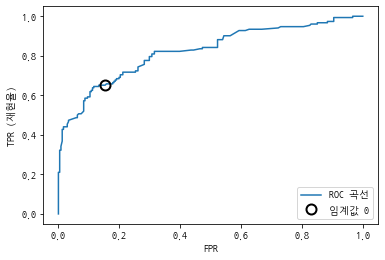

In [156]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, lr.decision_function(X_test))

plt.plot(fpr, tpr, label = 'ROC 곡선')
plt.xlabel('FPR')
plt.ylabel('TPR (재현율)')
# 0 근처의 임계값을 찾습니다.
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize = 10,
        label = '임계값 0', fillstyle = 'none', c = 'k', mew = 2)
plt.legend(loc = 4)

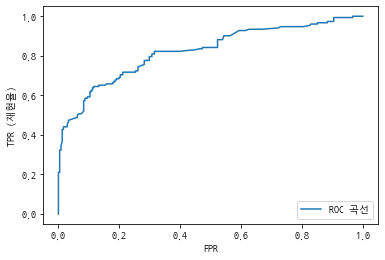

In [157]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, lr.decision_function(X_test))

plt.plot(fpr, tpr, label = 'ROC 곡선')
plt.xlabel('FPR')
plt.ylabel('TPR (재현율)')
# 0 근처의 임계값을 찾습니다.
# close_zero = np.argmin(np.abs(thresholds))
# plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize = 10,
#         label = '임계값 0', fillstyle = 'none', c = 'k', mew = 2)
plt.legend(loc = 4)

In [160]:
from sklearn.metrics import roc_auc_score
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
# svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print('lr의 AUC: {:.3f}'.format(lr_auc))
# print('SVC의 AUC: {:.3f}'.format(svc_auc))

lr의 AUC: 0.824


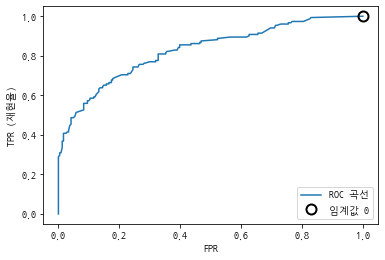

In [151]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label = 'ROC 곡선')
plt.xlabel('FPR')
plt.ylabel('TPR (재현율)')
# 0 근처의 임계값을 찾습니다.
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize = 10,
        label = '임계값 0', fillstyle = 'none', c = 'k', mew = 2)
plt.legend(loc = 4)

In [152]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
# svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print('랜덤 포레스트의 AUC: {:.3f}'.format(rf_auc))
# print('SVC의 AUC: {:.3f}'.format(svc_auc))

랜덤 포레스트의 AUC: 0.827


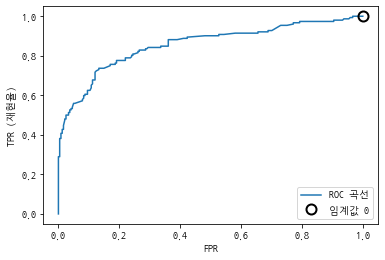

In [153]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, xgb.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label = 'ROC 곡선')
plt.xlabel('FPR')
plt.ylabel('TPR (재현율)')
# 0 근처의 임계값을 찾습니다.
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize = 10,
        label = '임계값 0', fillstyle = 'none', c = 'k', mew = 2)
plt.legend(loc = 4)

In [158]:
from sklearn.metrics import roc_auc_score
xgb_auc = roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])
# svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print('xgboost의 AUC: {:.3f}'.format(xgb_auc))
# print('SVC의 AUC: {:.3f}'.format(svc_auc))

xgboost의 AUC: 0.856


In [161]:
from sklearn.metrics import accuracy_score

In [162]:
accuracy_score(y_test, xgb_y_pred)

0.7964376590330788

# 3. 비정형 데이터마이닝 (사용 데이터 : 문재인대통령 취임사)

### 1) ‘연설문.txt’ 데이터를 읽어온 뒤 숫자, 특수 문자 등을 제거하는 전처리 작업을 시행하시오.

In [163]:
def read_data(filename):
    with open(filename, 'r', encoding = 'cp949') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:]
    return data

In [164]:
text = read_data('./data/모의고사 2회/연설문.txt')

In [166]:
text = ' '.join(x for x in np.array(text).reshape(-1,))

In [167]:
text[:100]

'국민 여러분의 위대한 선택에 머리 숙여 깊이 감사드립니다. 저는 오늘 대한민국 제19대 대통령으로서 새로운 대한민국을 향해 첫걸음을 내딛습니다. 지금 제 두 어깨는 국민 여러분으로'

In [168]:
import konlpy
import re

In [169]:
def cleansing(text):
    repl = ''
    pattern  = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)'
    text = re.sub(pattern = pattern, repl = repl, string = text)
    pattern  = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+'
    text = re.sub(pattern = pattern, repl = repl, string = text)
    pattern  = '([ㄱ-ㅎㅏ-ㅣ]+)'
    text = re.sub(pattern = pattern, repl = repl, string = text)
    pattern  = '<[^>]*>'
    text = re.sub(pattern = pattern, repl = repl, string = text)
    pattern = '[^\w\s]'
    text = re.sub(pattern = pattern, repl = repl, string = text)
    return text    

In [170]:
text = cleansing(text)

In [172]:
from konlpy.tag import Komoran
komoran = Komoran()
nouns = komoran.nouns(text)

In [173]:
from collections import Counter
cnt = Counter(nouns)

In [174]:
temp_df = pd.DataFrame(columns = ['명사', '빈도'])
freq = cnt.most_common(10)
temp_list = []
temp_list2= []
for i in freq:
    temp_list.append(i[0])
    temp_list2.append(i[1])
temp_df['명사'] = temp_list
temp_df['빈도'] = temp_list2
temp_df

,명사,빈도
0,국민,18
1,대통령,15
2,대한민국,8
3,나라,6
4,오늘,4
5,정치,4
6,머리,3
7,역사,3
8,앞,3
9,대화,3


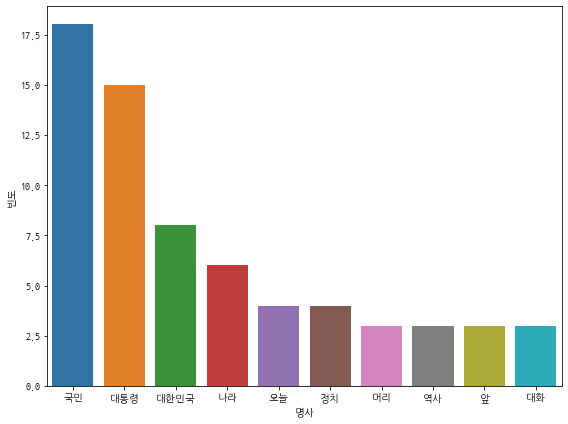

In [175]:
plt.figure(figsize = (8,6))
sns.barplot(x = '명사', y = '빈도', data = temp_df)
plt.tight_layout()
plt.show()

In [176]:
words = {}
for i in cnt.most_common(20):
    words[i[0]] = i[1]   

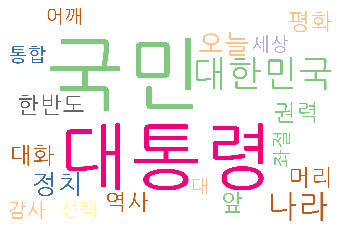

In [177]:
from wordcloud import WordCloud 
import nltk
from nltk.corpus import stopwords

wordcloud = WordCloud(font_path = "/usr/share/fonts/NanumGothicCoding.ttf", background_color='white',colormap = "Accent_r",
                      width=1500, height=1000).generate_from_frequencies(words)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='white',colormap = "Accent_r",
#                       width=1500, height=1000).generate_from_frequencies(words)
# plt.imshow(wordcloud)
# plt.axis('off')
# plt.show()